In [1]:
import os
import sys
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import utils

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-27 17:20:32.679890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sns.set_style("darkgrid")

In [3]:
data_arr = utils.load_data(base_path="../data/arrays", mask=False)

Loading variables: ['ndvi', 't2m', 'tp']
ndvi stats:
 - Mean: 0.5446051576895847
 - Std: 0.19850852229007196
 - Min: 0.07692307692307684
 - Max: 0.9543107692307701
t2m stats:
 - Mean: 278.6828
 - Std: 11.057514
 - Min: 240.43307
 - Max: 300.77982
tp stats:
 - Mean: 0.0012321946
 - Std: 0.0015912821
 - Min: 0.0
 - Max: 0.022768673
Data loaded with shape: (640, 73, 147, 3)


In [4]:
test_arr = data_arr.copy()
test_arr = np.reshape(
    test_arr,
    (test_arr.shape[0], test_arr.shape[1] * test_arr.shape[2], test_arr.shape[3]),
)

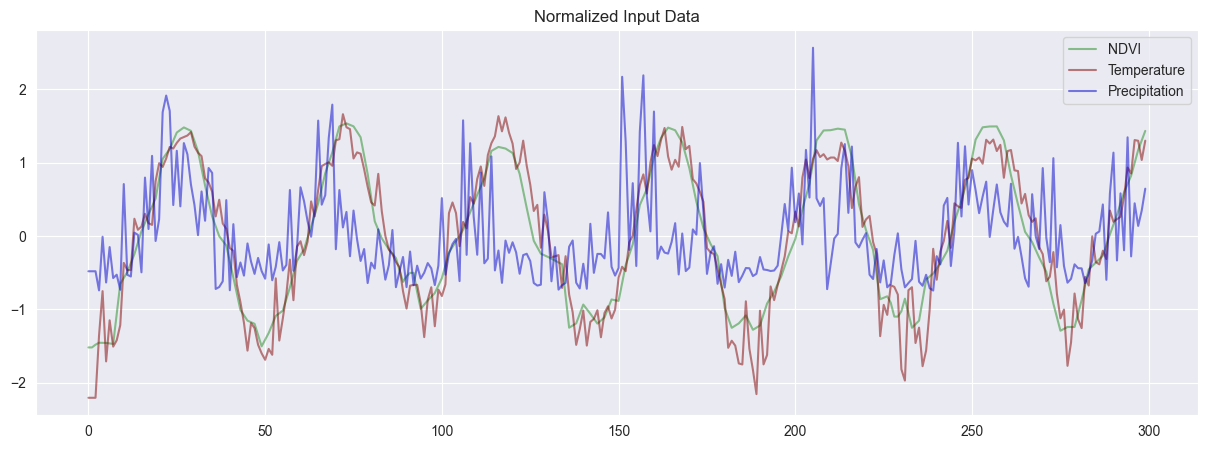

In [6]:
test_arr = data_arr[:300].copy()
test_arr = np.reshape(
    test_arr,
    (test_arr.shape[0], test_arr.shape[1] * test_arr.shape[2], test_arr.shape[3]),
)
test_arr = (
    test_arr
    - np.nanmean(
        np.reshape(
            test_arr, (test_arr.shape[0] * test_arr.shape[1], test_arr.shape[2])
        ),
        axis=0,
    )
) / np.nanstd(
    np.reshape(test_arr, (test_arr.shape[0] * test_arr.shape[1], test_arr.shape[2])),
    axis=0,
)

# ntime, nchannels, nx, ny = test_arr.shape
# ntime, nx, ny, nchannels = test_arr.shape

fig, ax = plt.subplots(figsize=(15, 5))
for i, var in enumerate(utils.var_list):
    ax.plot(
        # np.nanmean(test_arr[:, i, :, :].reshape(ntime, nx * ny), axis=1),
        np.nanmean(test_arr[:, :, i], axis=1),
        color=utils.var_colors[var],
        label=utils.var_titles[var],
        alpha=0.5,
    )
plt.legend()
plt.title("Normalized Input Data")
plt.show()

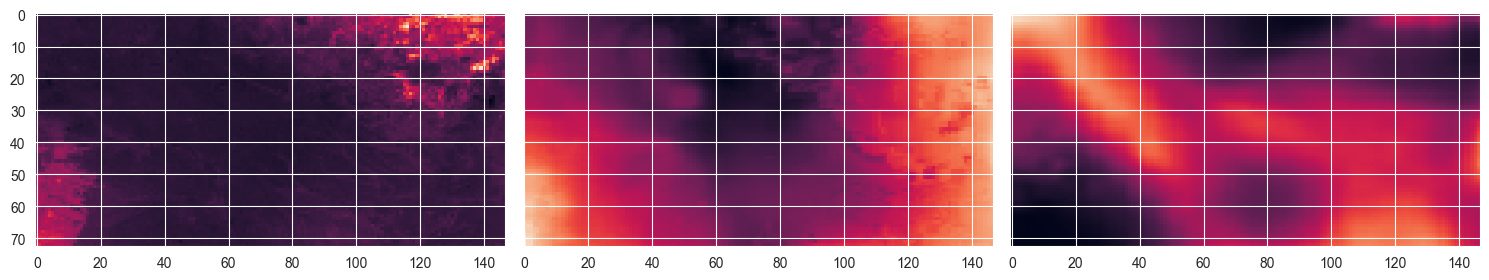

In [7]:
n = 3
fig, axes = plt.subplots(1, n, figsize=(15, 5), sharex=True, sharey=True)
axes = axes.ravel()
for i in range(n):
    axes[i].imshow(data_arr[0, :, :, i])
plt.tight_layout()
plt.show()

In [8]:
(
    inputs_train,
    outputs_train,
    inputs_val,
    outputs_val,
    inputs_test,
    outputs_test,
) = utils.normalize_and_split_data(data_arr, data_arr[:, :, :, 0])

Input train shape: (384, 73, 147, 3)
Output train shape: (384, 73, 147)
Input val shape: (128, 73, 147, 3)
Output val shape: (128, 73, 147)
Input test shape: (128, 73, 147, 3)
Output test shape: (128, 73, 147)


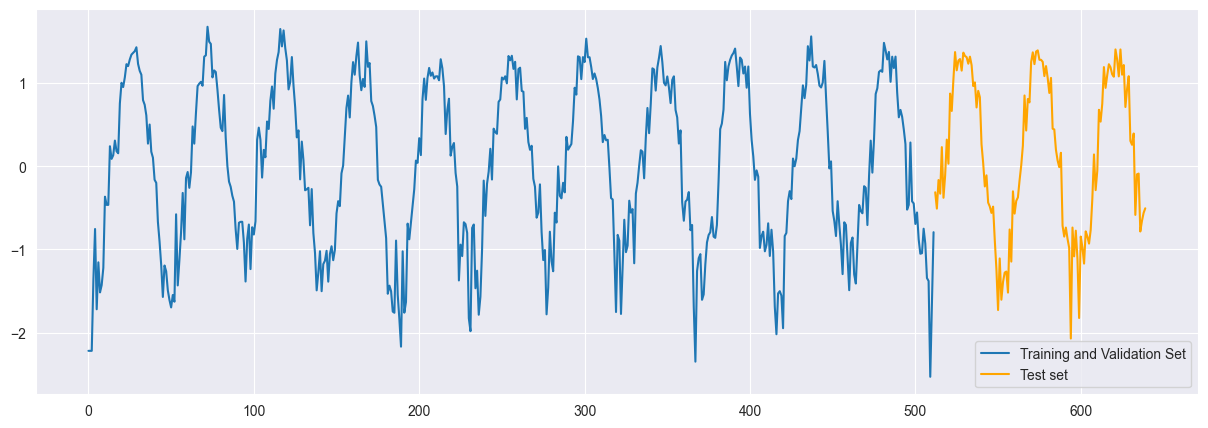

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
full_train = np.concatenate([inputs_train[:, :, :, 1], inputs_val[:, :, :, 1]])
existing_y = np.nanmean(
    np.reshape(
        full_train, (full_train.shape[0], full_train.shape[1] * full_train.shape[2])
    ),
    axis=1,
)
existing_x = list(range(len(existing_y)))
later_y = np.nanmean(
    np.reshape(
        inputs_test[:, :, :, 1],
        (
            inputs_test[:, :, :, 1].shape[0],
            inputs_test[:, :, :, 1].shape[1] * inputs_test[:, :, :, 1].shape[2],
        ),
    ),
    axis=1,
)
later_x = np.array(range(len(later_y))) + len(existing_x)
# found_y = np.nanmean(np.reshape(predictions, (predictions.shape[1], predictions.shape[2] * predictions.shape[3])), axis=1)
plt.plot(existing_x, existing_y, label="Training and Validation Set")
plt.plot(later_x, later_y, c="orange", label="Test set")
# plt.plot(later_x, found_y, c="red", label="Predictions")
plt.legend()
plt.show()

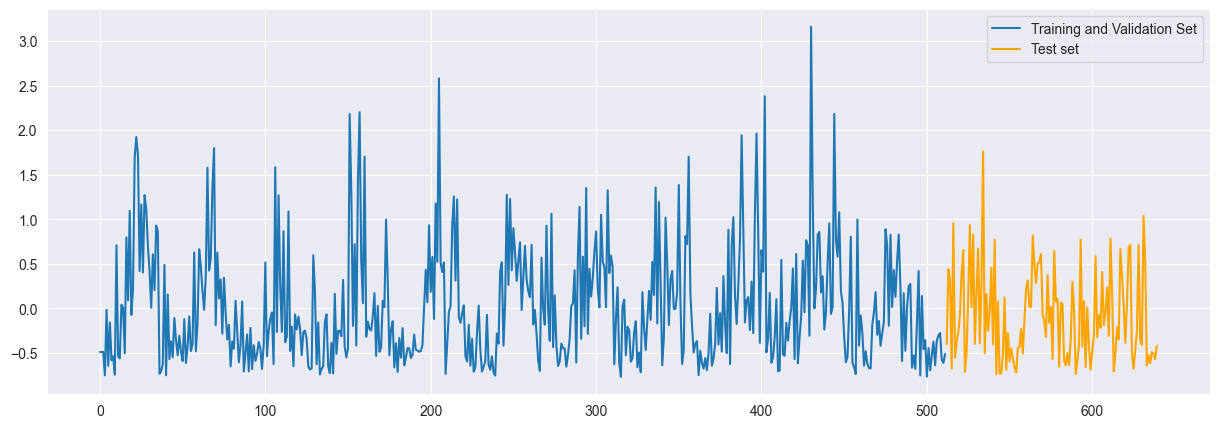

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
full_train = np.concatenate([inputs_train[:, :, :, 2], inputs_val[:, :, :, 2]])
existing_y = np.nanmean(
    np.reshape(
        full_train, (full_train.shape[0], full_train.shape[1] * full_train.shape[2])
    ),
    axis=1,
)
existing_x = list(range(len(existing_y)))
later_y = np.nanmean(
    np.reshape(
        inputs_test[:, :, :, 2],
        (
            inputs_test[:, :, :, 2].shape[0],
            inputs_test[:, :, :, 2].shape[1] * inputs_test[:, :, :, 2].shape[2],
        ),
    ),
    axis=1,
)
later_x = np.array(range(len(later_y))) + len(existing_x)
# found_y = np.nanmean(np.reshape(predictions, (predictions.shape[1], predictions.shape[2] * predictions.shape[3])), axis=1)
plt.plot(existing_x, existing_y, label="Training and Validation Set")
plt.plot(later_x, later_y, c="orange", label="Test set")
# plt.plot(later_x, found_y, c="red", label="Predictions")
plt.legend()
plt.show()

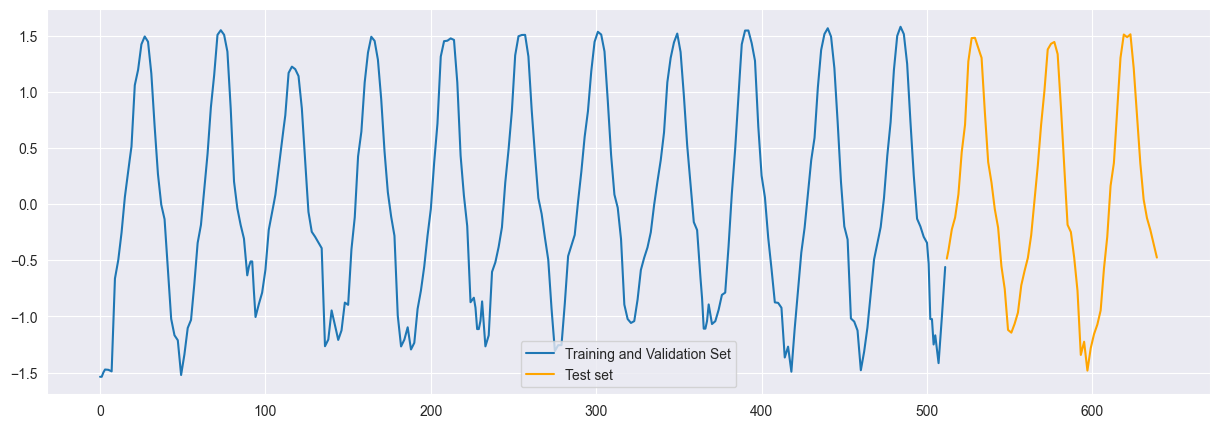

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
full_train = np.concatenate([inputs_train[:, :, :, 0], inputs_val[:, :, :, 0]])
existing_y = np.nanmean(
    np.reshape(
        full_train, (full_train.shape[0], full_train.shape[1] * full_train.shape[2])
    ),
    axis=1,
)
existing_x = list(range(len(existing_y)))
later_y = np.nanmean(
    np.reshape(
        inputs_test[:, :, :, 0],
        (
            inputs_test[:, :, :, 0].shape[0],
            inputs_test[:, :, :, 0].shape[1] * inputs_test[:, :, :, 0].shape[2],
        ),
    ),
    axis=1,
)
later_x = np.array(range(len(later_y))) + len(existing_x)
# found_y = np.nanmean(np.reshape(predictions, (predictions.shape[1], predictions.shape[2] * predictions.shape[3])), axis=1)
plt.plot(existing_x, existing_y, label="Training and Validation Set")
plt.plot(later_x, later_y, c="orange", label="Test set")
# plt.plot(later_x, found_y, c="red", label="Predictions")
plt.legend()
plt.show()

In [12]:
year_val = int(360 / 8)
year_val

45

In [16]:
# output_compare = data_arr[: -(outputs_test.shape[0] + year_val * 3), :, :, 0]
# output_compare.shape

(377, 73, 147)

In [13]:
### Naive 1: Year n = Year n-1
naive_one = data_arr[-(outputs_test.shape[0] + year_val * 3) : -year_val * 3, :, :, 0]

naive_one_rmse = np.sqrt(np.nanmean((outputs_test - naive_one) ** 2))
naive_one_rmse

0.09195881592076377

In [19]:
### Naive 2: Year 3 = Year 2, Temp multiplier
temp_multiplier = abs(np.nanmean(outputs_train / inputs_train[:, :, :, 1]))

naive_two = outputs_test * temp_multiplier

naive_two_rmse = np.sqrt(np.nanmean((outputs_test - naive_two) ** 2))
naive_two_rmse

0.41868100655746626

/opt/anaconda3/envs/pytensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/pytensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/pytensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


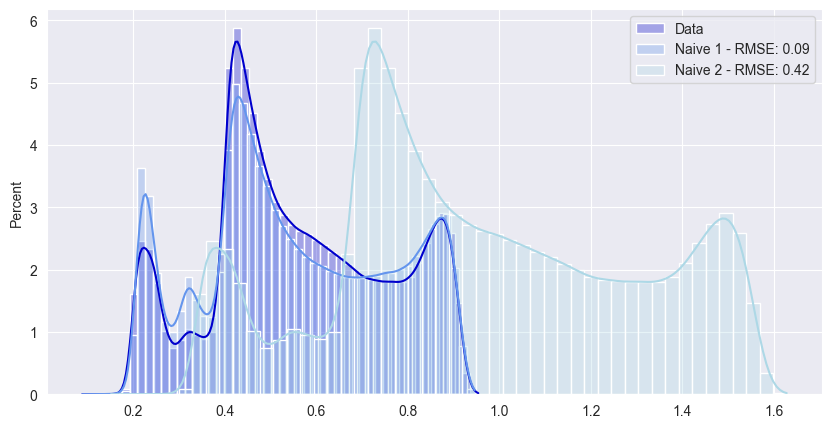

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(
    outputs_test.flatten(),
    bins=50,
    color="mediumblue",
    alpha=0.3,
    kde=True,
    ax=ax,
    stat="percent",
    label="Data",
)
sns.histplot(
    naive_one.flatten(),
    bins=50,
    color="cornflowerblue",
    alpha=0.3,
    kde=True,
    ax=ax,
    stat="percent",
    label=f"Naive 1 - RMSE: {np.round(naive_one_rmse, 2)}",
)
sns.histplot(
    naive_two.flatten(),
    bins=50,
    color="lightblue",
    alpha=0.3,
    kde=True,
    ax=ax,
    stat="percent",
    label=f"Naive 2 - RMSE: {np.round(naive_two_rmse, 2)}",
)
plt.legend()